<a href="https://colab.research.google.com/github/Mahdi-Saadati/Artificial-Intelligence-workshop/blob/main/2.a.%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

📌 رگرسیون لجستیک (Logistic Regression) یعنی چی؟

رگرسیون لجستیک یک مدل تصمیم‌گیری دوحالته است؛ یعنی به سؤالاتی از این جنس جواب می‌دهد:

بیمار دیابت دارد یا ندارد؟

تست مثبت است یا منفی؟

فرد در معرض خطر هست یا نیست؟

پس خروجی آن معمولاً فقط:

بله / خیر
یا
0 / 1

🩺 مثال ساده پزشکی: تشخیص دیابت

فرض کنید یک پزشک این اطلاعات را از بیماران دارد:

سن

BMI (شاخص توده بدنی)

قند خون ناشتا

سابقه خانوادگی دیابت

و می‌خواهد پیش‌بینی کند:

آیا این فرد دیابت دارد یا نه؟

اینجاست که رگرسیون لجستیک وارد می‌شود.

🤔 رگرسیون لجستیک چگونه فکر می‌کند؟

مدل از خودش می‌پرسد:

«با توجه به این مقدار قند خون، BMI و سن،
چقدر احتمال دارد این فرد دیابت داشته باشد؟»

مثلاً خروجی مدل می‌شود:

احتمال دیابت = 0.82

حالا تصمیم نهایی:

اگر احتمال > 0.5 → دیابت دارد (1)

اگر احتمال ≤ 0.5 → دیابت ندارد (0)

چرا در پزشکی خیلی محبوب است؟

✔ قابل تفسیر است

✔ پزشک می‌فهمد هر عامل چقدر اثر دارد

✔ سریع و ساده

✔ مناسب داده‌های بالینی

مثلاً می‌توان گفت:

«قند خون از BMI مهم‌تر بوده است»

جمع‌بندی 🌱

رگرسیون لجستیک = مدل تشخیص بله/خیر

در پزشکی = تشخیص بیماری

در دیتاست دیابت = پیش‌بینی داشتن یا نداشتن دیابت

خروجی = احتمال


درکد زیر دستور
confusion_matrix(y_test, y_pred)
می‌گوید:

مدل چند نفر را درست و چند نفر را اشتباه تشخیص داده است.

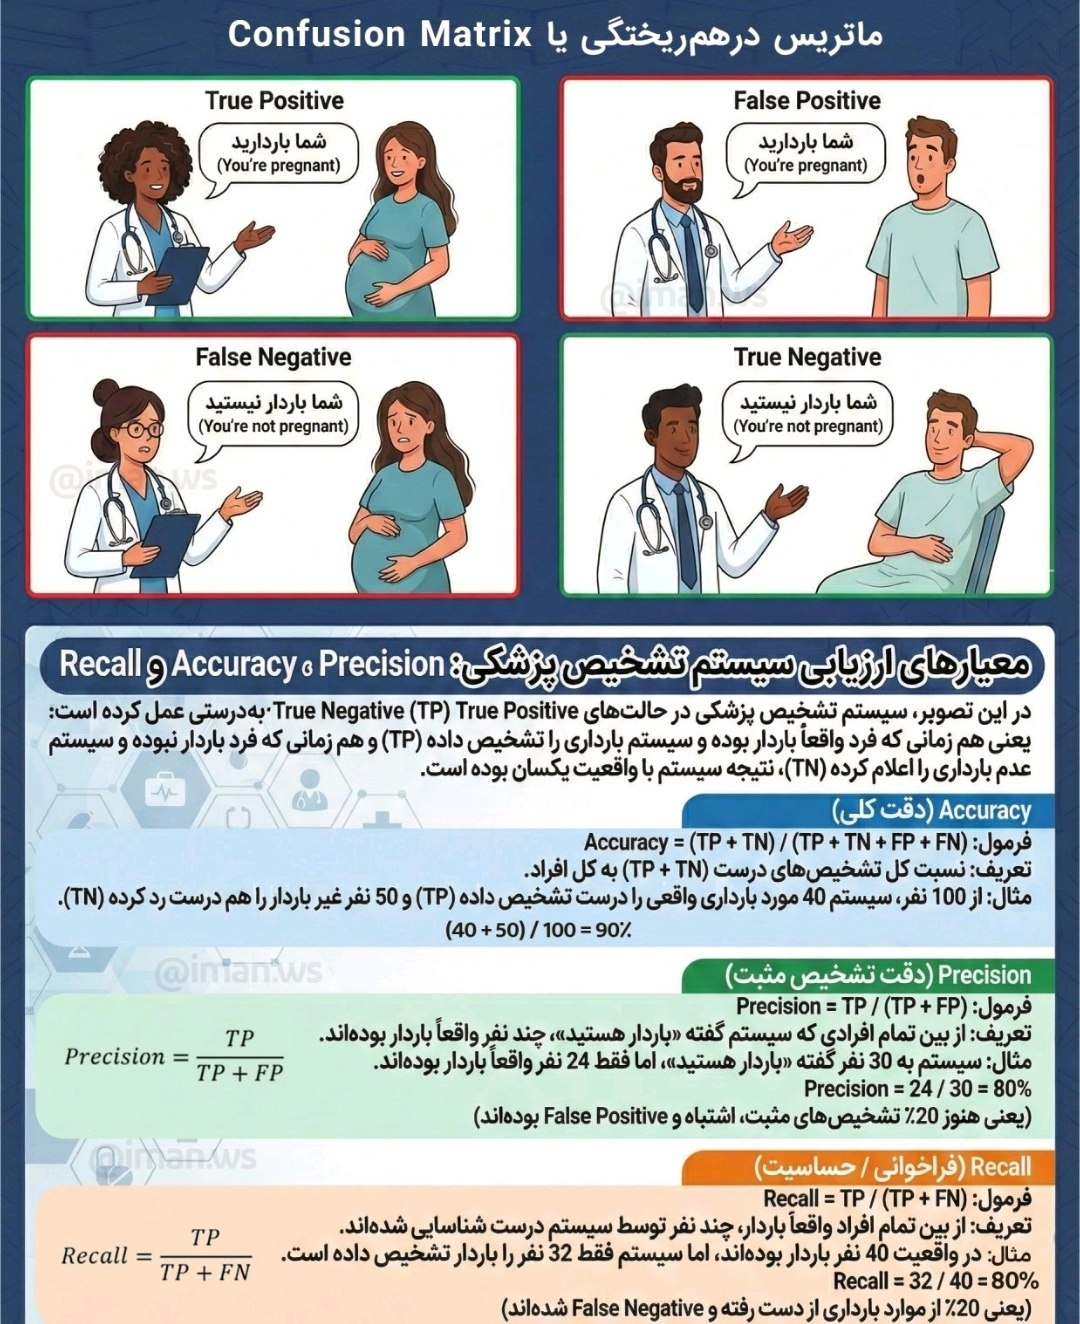

ماتریس درهم‌ریختگی یعنی چی؟

یک جدول 2×2 است:

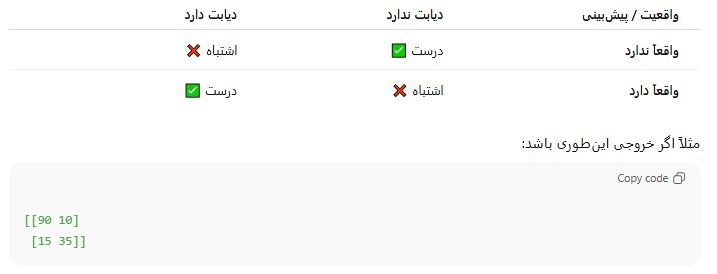

یعنی:

90 نفر → درست گفتی دیابت ندارند ✅

10 نفر → اشتباه گفتی دیابت دارند ❌

15 نفر → دیابت داشتند ولی نگفتی ❌ (خیلی مهم پزشکی!)

35 نفر → درست گفتی دیابت دارند ✅

📌 این جدول برای پزشکی خیلی مهم‌تر از accuracy است.

دستور:
classification_report(y_test, y_pred)
نیز
یک گزارش کامل نمره‌دهی به مدل می‌دهد.

مثل کارنامه مدرسه 📊

داخلش چی هست؟

برای هر کلاس (دیابت دارد / ندارد) می‌گوید:

Precision (دقت):

از کسانی که گفتی «دیابت دارند»، چند نفر واقعاً داشتند؟

Recall (حساسیت):

از کسانی که واقعاً دیابت داشتند، چند نفر را پیدا کردی؟

⚠️ Recall در پزشکی خیلی خیلی مهم است
چون:

بیمار دیابتی جا مانده = خطرناک ❌

F1-score:

یک نمره کلی بین Precision و Recall

خیلی خودمونی جمع‌بندی 🧠

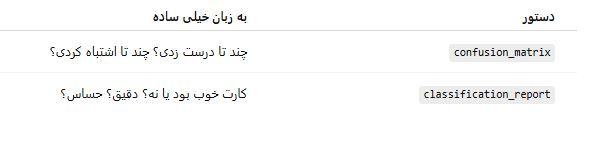

مثال خیلی کوتاه پزشکی 🩺

اگر:

Accuracy بالا باشد ❌

ولی Recall پایین باشد ❌❌

یعنی:

مدل آدم‌های دیابتی را جا می‌اندازد 😬

پس این دو print آخر کمک می‌کنند:

بفهمیم مدل قابل استفاده بالینی هست یا نه

In [ ]:
# 1. وارد کردن کتابخانه‌های مورد نیاز
import numpy as np  # برای کار با آرایه‌ها و محاسبات عددی
import pandas as pd  # برای کار با داده‌ها و دیتاست‌ها
from sklearn.model_selection import train_test_split  # برای تقسیم داده‌ها به دو بخش آموزشی و تستی
from sklearn.linear_model import LogisticRegression  # برای الگوریتم رگرسیون لجستیک
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # برای ارزیابی مدل

# -----------------------------
# 2. بارگذاری دیتاست
# -----------------------------
url = "Dataset/diabetes.csv"  # مسیر فایل دیتاست (در اینجا فرض شده که فایل diabetes.csv در پوشه Dataset قرار دارد)
columns = [  # نام ستون‌ها را مشخص می‌کنیم
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"
]

# بارگذاری دیتاست از فایل CSV و مشخص کردن نام ستون‌ها
df = pd.read_csv(url, names=columns, header=0)  # پارامتر 'header=0' باعث می‌شود که سطر اول فایل CSV به عنوان نام ستون‌ها استفاده شود.

# نمایش ابعاد دیتاست (تعداد سطرها و ستون‌ها) و مشاهده 5 ردیف اول دیتاست برای بررسی
print("Shape:", df.shape)  # نمایش تعداد ردیف‌ها و ستون‌ها
print(df.head())  # نمایش 5 ردیف اول دیتاست

# -----------------------------
# 3. جدا کردن ویژگی‌ها و لیبل
# -----------------------------
# ویژگی‌ها را از لیبل جدا می‌کنیم
X = df.drop("Outcome", axis=1)  # حذف ستون "Outcome" برای ایجاد ویژگی‌ها (X)
y = df["Outcome"]  # ستون "Outcome" را به عنوان لیبل (y) در نظر می‌گیریم

# -----------------------------
# 4. تقسیم داده‌ها به داده‌های آموزشی و تستی
# -----------------------------
# داده‌ها را به دو بخش آموزشی (80%) و تستی (20%) تقسیم می‌کنیم
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80% داده‌ها برای آموزش و 20% برای تست
)

# -----------------------------
# 5. ساخت و آموزش مدل رگرسیون لجستیک
# -----------------------------
# مدل رگرسیون لجستیک را ایجاد کرده و آن را روی داده‌های آموزشی می‌آموزیم
model = LogisticRegression(max_iter=500)  # ساخت مدل رگرسیون لجستیک با 500 تکرار
model.fit(X_train, y_train)  # آموزش مدل روی داده‌های آموزشی (X_train, y_train)

# -----------------------------
# 6. پیش‌بینی و ارزیابی مدل
# -----------------------------
# پیش‌بینی مقادیر لیبل برای داده‌های تستی (X_test)
y_pred = model.predict(X_test)

# نمایش دقت مدل (Accuracy)، ماتریس درهم‌ریختگی (Confusion Matrix) و گزارش طبقه‌بندی (Classification Report)
print("\nAccuracy:", accuracy_score(y_test, y_pred))  # دقت مدل
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))  # ماتریس درهم‌ریختگی
#print("\nClassification Report:\n", classification_report(y_test, y_pred))  # گزارش طبقه‌بندی شامل دقت، بازیابی، F1-score


# -----------------------------
# 7. پیش‌بینی بیمار جدید
# -----------------------------
# مثال: داده‌های یک بیمار فرضی (8 ویژگی ورودی)
# مقدارها فقط نمونه هستند — شما باید مقدارهای واقعی یا ساخته‌شده خود را قرار دهید

# تبدیل به آرایه 2بعدی (مدل انتظار دارد شکل (1,8) باشد)
new_patient_reshaped = [[2, 120, 70, 25, 80, 30.5, 0.35, 35]]

# پیش‌بینی خروجی: 0 یا 1
prediction = model.predict(new_patient_reshaped)[0]

# پیش‌بینی احتمال خروجی
probabilities = model.predict_proba(new_patient_reshaped)[0]

print("\nPrediction (0=سالم, 1=دیابتی):", prediction)
print("Probability of class 0:", probabilities[0])
print("Probability of class 1:", probabilities[1])
